Assignment 3: Building an Image Classification Model 🖼️
Build an image classification model divided into four stages.

a. Loading and preprocessing the image data. 🖼️
b. Defining the model's architecture. 🏗️
c. Training the model. 📈
d. Estimating the model's performance. 📊

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\risha\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test),
                    batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.4275 - loss: 1.5698 - val_accuracy: 0.5411 - val_loss: 1.2901
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5611 - loss: 1.2324 - val_accuracy: 0.5843 - val_loss: 1.1692
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6184 - loss: 1.0844 - val_accuracy: 0.6214 - val_loss: 1.0722
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6566 - loss: 0.9794 - val_accuracy: 0.6462 - val_loss: 1.0062
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6869 - loss: 0.8956 - val_accuracy: 0.6694 - val_loss: 0.9358
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7086 - loss: 0.8339 - val_accuracy: 0.6740 - val_loss: 0.9382
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7232 - loss: 0.7907 - val_accuracy: 0.6647 - val_loss: 0.9601
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7405 - loss: 0.7382 - 

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 - 1s - 4ms/step - accuracy: 0.7129 - loss: 0.8490
Test Accuracy: 0.7129


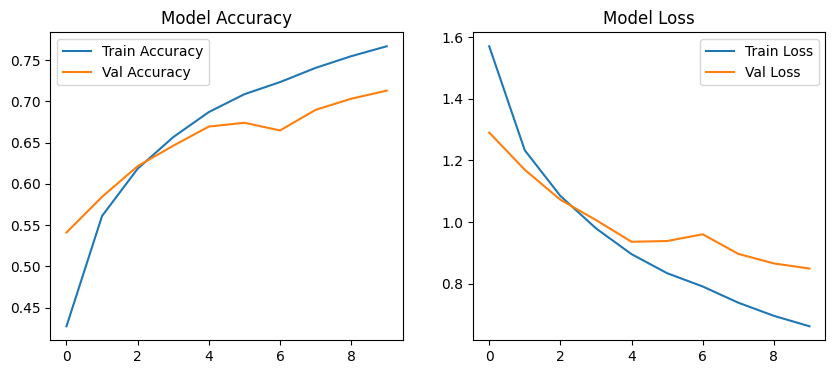

In [8]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [9]:
import numpy as np

In [10]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


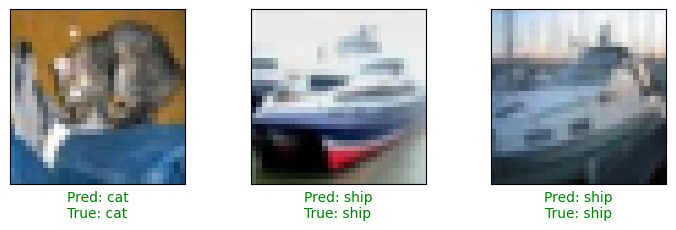

In [11]:
def display_predictions(images, labels, predictions, class_names, n=3):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(2, 5, i + 1)
        plt.xticks([]); plt.yticks([])
        plt.imshow(images[i])
        predicted_label = np.argmax(predictions[i])
        true_label = labels[i][0]
        color = 'green' if predicted_label == true_label else 'red'
        plt.xlabel(f"Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}", color=color)
    plt.show()

display_predictions(x_test, y_test, predictions, class_names)